In [0]:
!pip install staintools
!pip install spams

  Created wheel for staintools: filename=staintools-2.1.2-cp36-none-any.whl size=14070 sha256=1224710e2b07b5cc6e04604ab006eecdd8326bc96bede4eb07ec4a60717824f5
  Stored in directory: /root/.cache/pip/wheels/76/01/f8/81c62c374358f5baf8b278b5c57ab13534eb8f811bff1ddcb8
Successfully built staintools
     |████████████████████████████████| 1.9MB 7.1MB/s 
  Created wheel for spams: filename=spams-2.6.1-cp36-cp36m-linux_x86_64.whl size=4512984 sha256=8539bb3e832fcc2872df74365cd583fb8f9abc9d8fa50c85539a972e6460278a
  Stored in directory: /root/.cache/pip/wheels/76/a6/a8/5959872693a82d5497a91aee3665bb1676cee33304d86c1495
Successfully built spams


In [0]:
import os
import shutil
import numpy as np
import pandas as pd
import cv2
import imageio
from datetime import datetime as dt
import matplotlib.pyplot as plt
import random
from PIL import Image
import staintools



In [0]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
 11.pdf
 12.pdf
 13.pdf
'1 introducing-data-science-machine-learning-python.gdoc'
 1.pdf
'2 ISLR Seventh Printing.gdoc'
 2.pdf
 3.pdf
 4.pdf
 5.pdf
 5.txt
 6.pdf
 7.pdf
'Advanced iot.docx'
 angular
 angular_examples
'applied ai'
 books
 Brochure.gdoc
 certificates
'c++ Lab Manual (1).docx'
 Classroom
'CO lab 2.docx'
'Colab Notebooks'
'day10_express_validator_route (1).ppt'
'day11_AngularJS_intro (1).pptx'
'day12_MEAN_stack (3).ppt'
'day13_AngJS_validations (1)

In [0]:
!unzip -q "/content/drive/My Drive/Colab Notebooks/cell-images-for-detecting-malaria.zip" -d "/content/drive/My Drive/Colab Notebooks/final"

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/"

cell-images-for-detecting-malaria.zip  Untitled0.ipynb	Untitled4.ipynb
final				       Untitled3.ipynb


In [0]:
#A utility function to resize a given input image 
def resize_image(image):
    resized_image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA) #Resize all the images to 128X128 dimensions
    target = staintools.LuminosityStandardizer.standardize(resized_image)
    normalizer = staintools.StainNormalizer(method='vahadane')
    normalizer.fit(target)
    transformed = normalizer.transform(target)
    return resized_image

#This function is used to plot/update the train and test loss after all epochs
def plt_train_val_loss(x, val_loss, train_loss, ax, colors=['b']):
    plt.figure(figsize=(10,6))
    ax.plot(x, val_loss, 'b', label="Validation Loss")
    ax.plot(x, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
#This function is used to plot the train vs validation accuracy after all the epochs
def plt_train_val_acc(x, val_acc, train_acc, ax, colors=['b']):
    plt.figure(figsize=(10,6))
    ax.plot(x, val_loss, 'b', label="Validation Accuracy")
    ax.plot(x, train_loss, 'r', label="Train Accuracy")
    plt.legend()
    plt.grid()
    fig.canvas.draw()


In [0]:
source = '/content/drive/My Drive/Colab Notebooks/final/cell_images'
destination = '/content/drive/My Drive/Colab Notebooks/data'


In [0]:
source = '/content/drive/My Drive/Colab Notebooks/final/cell_images'
destination = '/content/drive/My Drive/Colab Notebooks/data'

#We will check if the folder 'data','train','test','validation' exists. If its not, we will create a folder with the same name
os.mkdir(destination) if not os.path.isdir(destination) else None
os.mkdir(destination+"/train") if not os.path.isdir(destination+"/train") else None
os.mkdir(destination+"/validation") if not os.path.isdir(destination+"/validation") else None
os.mkdir(destination+"/test") if not os.path.isdir(destination+"/test") else None

#We will check if the folder 'Parasitized' and 'Uninfected' exists. If its not, we will create a folder with the same name
os.mkdir(destination+"/train"+"/Parasitized") if not os.path.isdir(destination+"/train"+"/Parasitized") else None
os.mkdir(destination+"/train"+"/Uninfected") if not os.path.isdir(destination+"/train"+"/Uninfected") else None

os.mkdir(destination+"/validation"+"/Parasitized") if not os.path.isdir(destination+"/validation"+"/Parasitized") else None
os.mkdir(destination+"/validation"+"/Uninfected") if not os.path.isdir(destination+"/validation"+"/Uninfected") else None

os.mkdir(destination+"/test"+"/Parasitized") if not os.path.isdir(destination+"/test"+"/Parasitized") else None
os.mkdir(destination+"/test"+"/Uninfected") if not os.path.isdir(destination+"/test"+"/Uninfected") else None

In [0]:

par_filenames=os.listdir(source+"/Parasitized")
un_filenames=os.listdir(source+"/Uninfected")

#Get details about the number of images present
print("Number of images of type 'Parasitized': ",len(par_filenames))
print("Number of images of type 'Uninfected': ",len(un_filenames))

Number of images of type 'Parasitized':  13780
Number of images of type 'Uninfected':  13780


In [0]:
st=dt.now()

#First, the Parasitized images
par_train_images=random.sample(par_filenames,8000)
par_val_images=random.sample(list(set(par_filenames)-set(par_train_images)),3000)
par_test_images=list(set(par_filenames)-set(par_train_images)-set(par_val_images))

for file in par_train_images:
    if (file.endswith("png")):
        image=imageio.imread(source+"/Parasitized"+"/"+file)
        resized_image=resize_image(image)
        imageio.imsave(destination+"/train"+"/Parasitized/"+file,resized_image)
print("Train folder created for Parasitized images...")
        
for file in par_val_images:
    if (file.endswith("png")):
        image=imageio.imread(source+"/Parasitized"+"/"+file)
        resized_image=resize_image(image)
        imageio.imsave(destination+"/validation"+"/Parasitized/"+file,resized_image)
print("Validation folder created for Parasitized images...")
        
for file in par_test_images:
    if (file.endswith("png")):
        image=imageio.imread(source+"/Parasitized"+"/"+file)
        resized_image=resize_image(image)
        imageio.imsave(destination+"/test"+"/Parasitized/"+file,resized_image)
print("Test folder created for Parasitized images...")
        
#Now, the uninfected files
un_train_images=random.sample(un_filenames,8000)
un_val_images=random.sample(list(set(un_filenames)-set(un_train_images)),3000)
un_test_images=list(set(un_filenames)-set(un_train_images)-set(un_val_images))

for file in un_train_images:
    if (file.endswith("png")):
        image=imageio.imread(source+"/Uninfected"+"/"+file)
        resized_image=resize_image(image)
        imageio.imsave(destination+"/train"+"/Uninfected/"+file,resized_image)
print("Train folder created for Uninfected images...")

for file in un_val_images:
    if (file.endswith("png")):
        image=imageio.imread(source+"/Uninfected"+"/"+file)
        resized_image=resize_image(image)
        imageio.imsave(destination+"/validation"+"/Uninfected/"+file,resized_image)
print("Validation folder created for Uninfected images...")
    
for file in un_test_images:
    if (file.endswith("png")):
        image=imageio.imread(source+"/Uninfected"+"/"+file)
        resized_image=resize_image(image)
        imageio.imsave(destination+"/test"+"/Uninfected/"+file,resized_image)  
print("Test folder created for Uninfected images...")
        
print("\nTotal time taken to resize the images and create the dataset: ",dt.now()-st)

Train folder created for Parasitized images...
Validation folder created for Parasitized images...
Test folder created for Parasitized images...
Train folder created for Uninfected images...
Validation folder created for Uninfected images...
Test folder created for Uninfected images...

Total time taken to resize the images and create the dataset:  0:22:34.628225


In [0]:
DATADIR="/content/drive/My Drive/Colab Notebooks/"

In [0]:
os.mkdir("normalized_data") if not os.path.isdir("normalized_data") else None

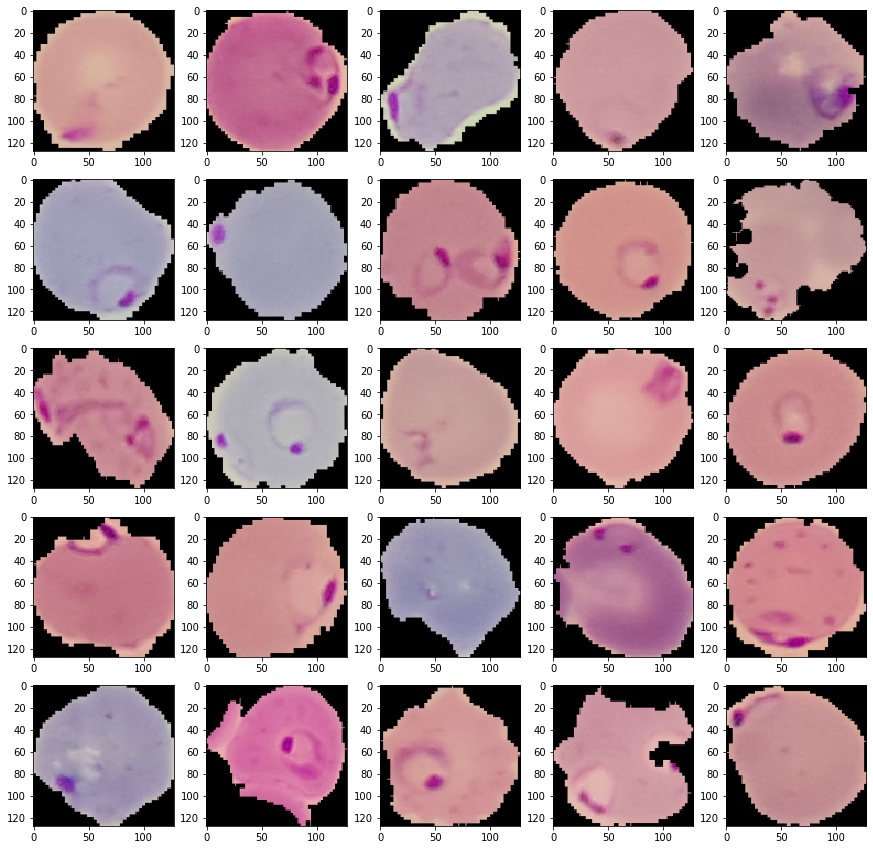

In [0]:
image_dir = "/content/drive/My Drive/Colab Notebooks/data/train/Parasitized/"
filenames=random.sample(os.listdir(image_dir),26)

#Display 25 images from Parasitized cells
plt.figure(figsize=(15,15))
for i in range(1,len(filenames)):
    row = i
    image = imageio.imread(image_dir+filenames[i]) #Image(filename=image_dir+filenames[i])
    plt.subplot(5,5,row)
    plt.imshow(image)
plt.show()

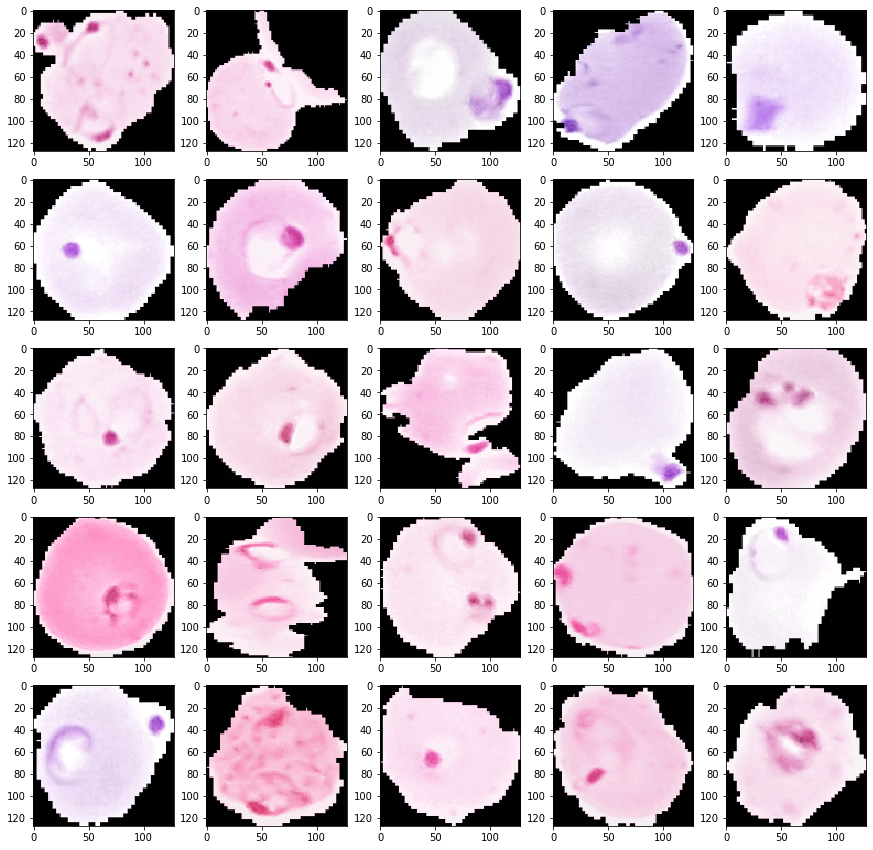

In [0]:
image_dir = "/content/drive/My Drive/Colab Notebooks/data/train/Parasitized/"
filenames=random.sample(os.listdir(image_dir),26)

#Display 25 images from Parasitized cells
plt.figure(figsize=(15,15))
for i in range(1,len(filenames)):
    row = i
    image = imageio.imread(image_dir+filenames[i]) #Image(filename=image_dir+filenames[i])
    target = staintools.LuminosityStandardizer.standardize(image)
    normalizer = staintools.StainNormalizer(method='vahadane')
    normalizer.fit(target)
    transformed = normalizer.transform(target)
    plt.subplot(5,5,row)
    plt.imshow(transformed)
plt.show()

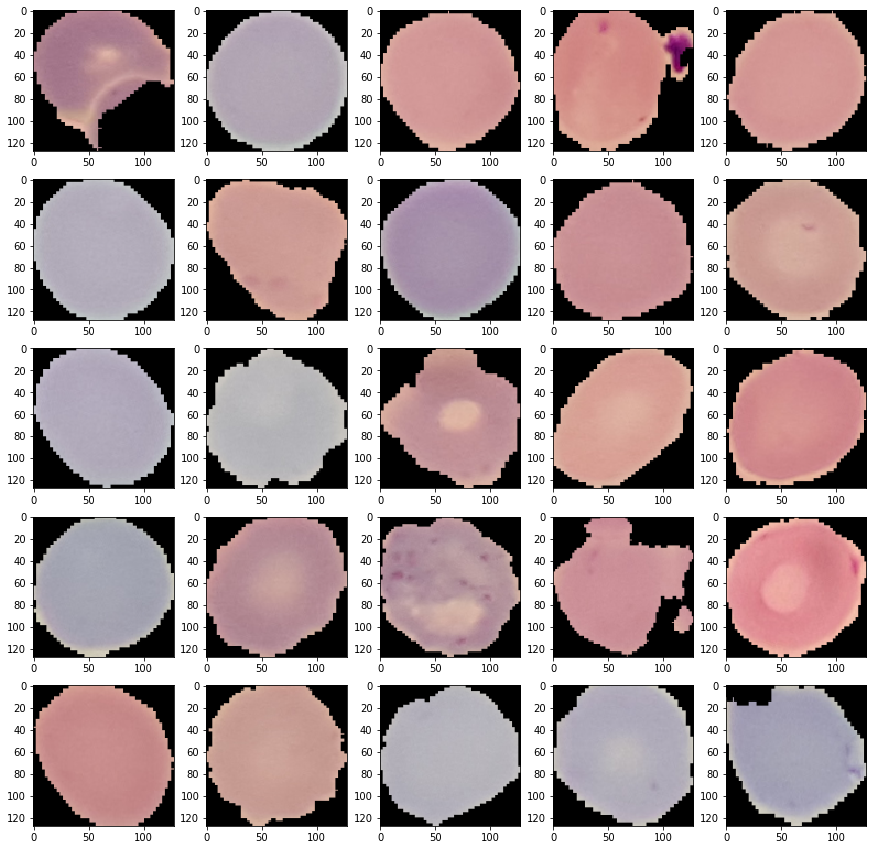

In [0]:
image_dir = "/content/drive/My Drive/Colab Notebooks/data/train/Uninfected/"
filenames=random.sample(os.listdir(image_dir),26)

#Display 25 images from Uninfected cells
plt.figure(figsize=(15,15))
for i in range(1,len(filenames)):
    row = i
    image = imageio.imread(image_dir+filenames[i]) #Image(filename=image_dir+filenames[i])
    plt.subplot(5,5,row)
    plt.imshow(image)
plt.show()

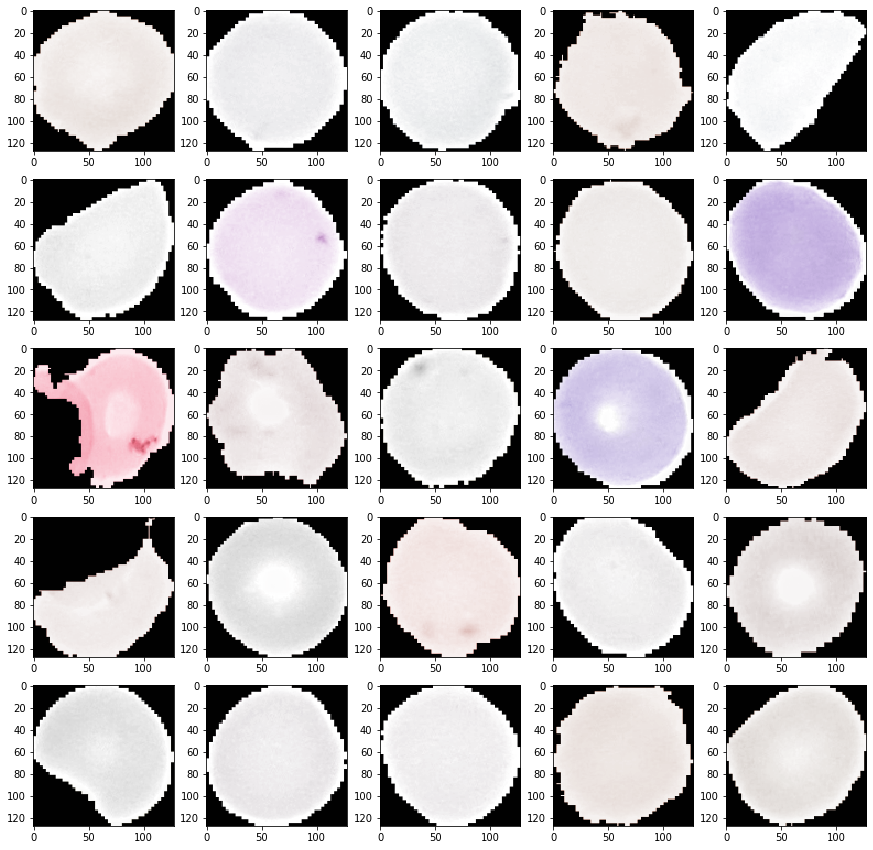

In [0]:
image_dir = "/content/drive/My Drive/Colab Notebooks/data/train/Uninfected/"
filenames=random.sample(os.listdir(image_dir),26)

#Display 25 images from Uninfected cells
plt.figure(figsize=(15,15))
for i in range(1,len(filenames)):
    row = i
    image = imageio.imread(image_dir+filenames[i]) #Image(filename=image_dir+filenames[i])
    target = staintools.LuminosityStandardizer.standardize(image)
    normalizer = staintools.StainNormalizer(method='vahadane')
    normalizer.fit(target)
    transformed = normalizer.transform(target)
    plt.subplot(5,5,row)
    plt.imshow(transformed)
plt.show()

In [0]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
from keras.optimizers import RMSprop
from keras import regularizers as reg
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
from keras import optimizers
from keras.callbacks import History
from keras import applications
from keras.utils.np_utils import to_categorical
import math  
import cv2 



Using TensorFlow backend.


In [0]:
img_width, img_height = 128, 128

#Declaration of parameters needed for training and validation
train_data_dir = '/content/drive/My Drive/Colab Notebooks/data/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/data/validation'
nb_train_samples = 16000 #8000 training samples for each class
nb_validation_samples = 6000 #3000 validation samples for each class
epochs = 20
batch_size = 20

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [0]:
model_vgg = applications.VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
model_vgg.summary()





58892288/58889256 [==============================] - 3s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
____________________________________________________

In [0]:
for layer in model_vgg.layers[:-1]:
        layer.trainable = False

In [0]:
model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(Flatten())
model_transfer_full.add(Dense(1024, activation='relu'))
model_transfer_full.add(Dropout(0.5))
model_transfer_full.add(Dense(512, activation='relu'))
model_transfer_full.add(Dropout(0.5))
model_transfer_full.add(Dense(256, activation='relu'))
model_transfer_full.add(Dense(2, activation='softmax'))
model_transfer_full.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
____

In [0]:
model_transfer_full.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        DATADIR+'data/train',
        target_size=(128, 128),
        batch_size=11,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        DATADIR+'data/validation',
        target_size=(128, 128),
        batch_size=11,
        class_mode='categorical')

history=model_transfer_full.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=11,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size,
        )

Found 15998 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/11
800/800 [==============================] - 99s 124ms/step - loss: 0.5289 - acc: 0.7936 - val_loss: 0.2645 - val_acc: 0.9055
Epoch 2/11
800/800 [==============================] - 92s 115ms/step - loss: 0.3204 - acc: 0.8640 - val_loss: 0.2204 - val_acc: 0.9107
Epoch 3/11
800/800 [==============================] - 91s 113ms/step - loss: 0.3007 - acc: 0.8758 - val_loss: 0.2064 - val_acc: 0.9197
Epoch 4/11
800/800 [==============================] - 89s 111ms/step - loss: 0.2771 - acc: 0.8874 - val_loss: 0.2064 - val_acc: 0.9268
Epoch 5/11
800/800 [==============================] - 89s 112ms/step - loss: 0.2569 - acc: 0.8986 - val_loss: 0.2294 - val_acc: 0.9127
Epoch 6/11
800/800 [==============================] - 89s 112ms/step - loss: 0.2607 - acc: 0.8981 - val_loss: 0.1812 - val_acc: 0.9372
Epoch 7/1

In [0]:
from sklearn.externals import joblib
joblib.dump(history,"/content/drive/My Drive/Colab Notebooks/normalized_data/malaria.pkl")

['/content/drive/My Drive/Colab Notebooks/normalized_data/malaria.pkl']

In [0]:
os.mkdir("/content/drive/My Drive/Colab Notebooks/normalized_data") if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/normalized_data") else None

In [0]:
!ls "/content/"

adc.json  drive  malaria.pkl  sample_data


In [0]:
os.mkdir("/content/drive/My Drive/Colab Notebooks/pickle_file") if not os.path.isdir("normalized_data") else None

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  
folder_id="1pLEIftkJjQuXEwBBwXw75j3CD_0kHIc5"
# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id': folder_id}]})
file.SetContentFile('malaria.pkl')
file.Upload() 

# New Section

In [0]:
!ls "/content/"

drive  sample_data


In [0]:
!mv "/content/malaria.pkl" "/content/drive/My Drive/Colab Notebooks/"

No handles with labels found to put in legend.
No handles with labels found to put in legend.


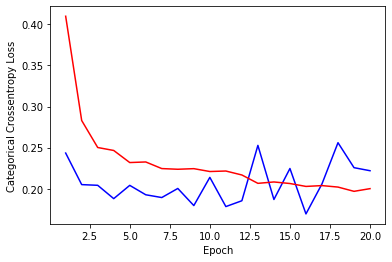

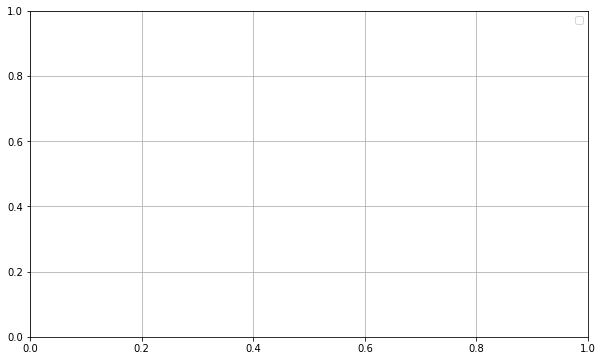

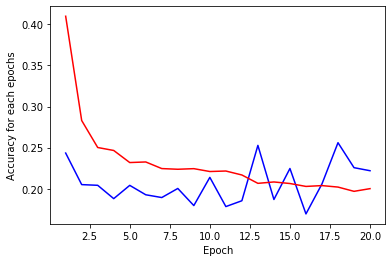

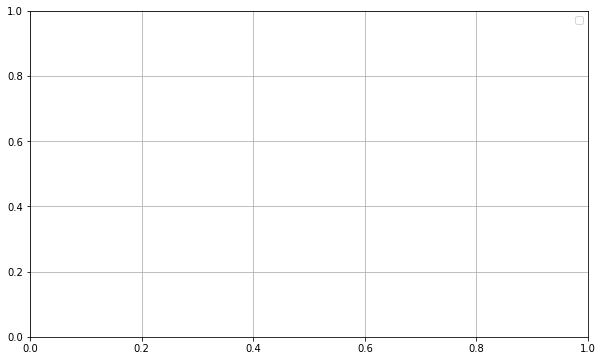

In [0]:
history=model_transfer_full.history

"""Plot train vs test loss"""
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,20+1))

#Display the loss
val_loss = history.history['val_loss'] #Validation Loss
train_loss = history.history['loss'] #Training Loss
plt_train_val_loss(x, val_loss, train_loss, ax)

"""Plot train vs validation accuracy"""
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Accuracy for each epochs')

#List of epoch numbers
x = list(range(1,20+1))

#Display the loss
val_acc = history.history['val_acc'] #Validation Accuracy
train_acc = history.history['acc'] #Training Accuracy
plt_train_val_acc(x, val_acc, train_acc, ax)